# STUDENT NAME: EMMANUEL ONYEDIKACHI KEVIN
# STUDENT ID: 202309926
# ASSIGNMENT: Customer Data Pre-processing
# COURSE NO: 771768 - Introduction to Programming for Artificial Intelligence and Data Science

# TASKS

In [5]:
import csv
import json
from datetime import datetime
from dateutil.relativedelta import relativedelta

### 1)  Read in the provided ACW Data using the CSV library

In [6]:
user_data = []
# open and read the csv file
with open("acw_user_data.csv", "r") as file:
    # create a variable to store file data
    users = csv.reader(file, delimiter = ",")
    # loop through the users data and print
    for user in users:
        # append all user data
        user_data.append(user)
        print(user)

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (Km)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']
['70 Lydia isle', 'Lake Conor', 'S71 7XZ', '89', '0', 'N/A', '08/18', '11/27', '676373692463', '875', '3', 'Kieran', 'GB62PQKB71416034141571', 'Wilson', 'married or civil partner', '7257', 'True', '72838', 'Male', 'Hyundai', 'Bonneville', '2009', 'Pickup']
['00 Wheeler wells', 'Chapmanton', 'L2 7BT', '46', '13.72', 'Begum-Williams', '08/12', '11/26', '4529436854129855', '583', '1', 'Jonathan', 'GB37UMCO54540228728019', 'Thomas', 'married or civil partner', '0', 'False', '54016', 'Male', 'Nissan', 'ATS', '1996', 'Coupe']
['Studio 33K Joel walk', 'Randallborough', 'ME3N 1GH',

### 2) As a CSV file is an entirely flat file structure, we need to convert our data back into its      rich structure. Convert all flat structures into nested structures. These are notably: 
        a. Vehicle - consists of make, model, year, and type 
        b. Credit Card - consists of start date, end date, number, security code, and IBAN. 
        c. Address - consists of the main address, city, and postcode.

In [10]:
# inspect the CSV headers
headers = user_data[0]

print(f"CSV headers:\n\n{headers}\n\nTotal columns: {len(headers)} ")

CSV headers:

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (Km)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']

Total columns: 23 


In [11]:
problematic_row = []  
customers_data = []
   

# open, read and close the csv data
with open("acw_user_data.csv", "r") as csv_file:
    
    # read file as a dictionary from csv file
    dict_data = csv.DictReader(csv_file)
    
    # loop through the csv dictionary data
    for i, row_data in  enumerate(dict_data):
        
         # convert depandant to proper data type
        dependants = row_data["Dependants"]
        if dependants == "":
            # append the problematic data to the customers_data list
            problematic_row.append(i)
            dependants = 0
            
        # create a dictionary customer data 
        customer = {
            "address" : {
            "street": row_data["Address Street"],
            "city": row_data["Address City"],
            "postcode": row_data["Address Postcode"],
        },
            "vehicle" : {
            "make": row_data["Vehicle Make"],
            "model": row_data["Vehicle Model"],
            "year":  row_data["Vehicle Year"],
            "type": row_data["Vehicle Type"],     
        },
           "credit_card" : {
            "start_date": row_data["Credit Card Start Date"],
            "expiry_date": row_data["Credit Card Expiry Date"],
            "number": int(row_data["Credit Card Number"]),
            "cvv": int(row_data["Credit Card CVV"]),
            "iban": row_data["Bank IBAN"], 
        }, 
            
        "age" : int(row_data["Age (Years)"]) ,   
        "distance_commuted" : float(row_data["Distance Commuted to Work (Km)"]) ,                              
        "employer_company" : row_data["Employer Company"] ,
        "dependants" : int(dependants) ,
        "first_name" : row_data["First Name"] ,
        "last_name" : row_data["Last Name"] ,
        "marital_status" : row_data["Marital Status"],
        "yearly_pension" : float(row_data["Yearly Pension (GBP)"]),
        "retired" : row_data["Retired"],
        "Yearly Salary (GBP)" : float(row_data["Yearly Salary (GBP)"]),
        "sex" : row_data["Sex"],    
        }

        # append the data to the customers_data list
        customers_data.append(customer)

# print the customer nested structure      
print(customers_data[:2])

[{'address': {'street': '70 Lydia isle', 'city': 'Lake Conor', 'postcode': 'S71 7XZ'}, 'vehicle': {'make': 'Hyundai', 'model': 'Bonneville', 'year': '2009', 'type': 'Pickup'}, 'credit_card': {'start_date': '08/18', 'expiry_date': '11/27', 'number': 676373692463, 'cvv': 875, 'iban': 'GB62PQKB71416034141571'}, 'age': 89, 'distance_commuted': 0.0, 'employer_company': 'N/A', 'dependants': 3, 'first_name': 'Kieran', 'last_name': 'Wilson', 'marital_status': 'married or civil partner', 'yearly_pension': 7257.0, 'retired': 'True', 'Yearly Salary (GBP)': 72838.0, 'sex': 'Male'}, {'address': {'street': '00 Wheeler wells', 'city': 'Chapmanton', 'postcode': 'L2 7BT'}, 'vehicle': {'make': 'Nissan', 'model': 'ATS', 'year': '1996', 'type': 'Coupe'}, 'credit_card': {'start_date': '08/12', 'expiry_date': '11/26', 'number': 4529436854129855, 'cvv': 583, 'iban': 'GB37UMCO54540228728019'}, 'age': 46, 'distance_commuted': 13.72, 'employer_company': 'Begum-Williams', 'dependants': 1, 'first_name': 'Jonathan

In [12]:
customers_data[21]

{'address': {'street': '9 Hargreaves loaf',
  'city': 'New Keith',
  'postcode': 'OX85 1NN'},
 'vehicle': {'make': 'MAZDA',
  'model': 'Tundra Regular Cab',
  'year': '2001',
  'type': 'Sedan'},
 'credit_card': {'start_date': '09/18',
  'expiry_date': '02/23',
  'number': 3577676608962779,
  'cvv': 426,
  'iban': 'GB24RDII19341179851384'},
 'age': 40,
 'distance_commuted': 11.98,
 'employer_company': 'Frost-Howard',
 'dependants': 0,
 'first_name': 'Sian',
 'last_name': 'Marshall',
 'marital_status': 'married or civil partner',
 'yearly_pension': 0.0,
 'retired': 'False',
 'Yearly Salary (GBP)': 44434.0,
 'sex': 'Female'}

### 3) The client informs you that they have had difficulty with errors in the dependants column. 
Some entries are empty (i.e. “ “ or “”), which may hinder your conversion 
from Task 2. These should be changed into something meaningful when 
encountered. 

Print a list where all such error corrections take place. 

In [13]:
print(f"Problematic rows for dependants: {problematic_row}")

Problematic rows for dependants: [21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


### 4) Write all records to a processed.json file in the JSON data format. 
This should be a list of dictionaries, where each index of the list is a dictionary representing a singular person.

In [14]:
#  write all users record to a json file
try:
    with open("processed.json", "w") as file:
        json.dump(customers_data, file, indent=4)
    print("processed.json file has been created.")
except Exception as e:
    print("Error", e)

processed.json file has been created.


# 5) You should create two additional file outputs, retired.json and employed.json.
These should contain all retired customers (as indicated by the retired field in the 
CSV), and all employed customers respectively (as indicated by the employer field in 
the CSV) and be in the JSON data format. 

In [15]:
# get all customers that are retired
retired_customers = []

# loop through the custormers data
for i in range(0,len(customers_data)):
    
    if customers_data[i]["retired"] == "True":
        retired_customers.append(customers_data[i])

#  write all retired customers record to a json file
try:
    with open("retired.json", "w") as file:
        json.dump(retired_customers, file, indent=4)
    print("retired.json file has been created.")
except Exception as e:
    print("Error", e)    

retired.json file has been created.


In [16]:
# get all customers that are employed
employed_customers = []

# loop through the custormers data
for i in range(0,len(customers_data)):
    
    if customers_data[i]["employer_company"] != "N/A":
        employed_customers.append(customers_data[i])
        
#  write all employed customers record to a json file
try:
    with open("employed.json", "w") as file:
        json.dump(employed_customers, file, indent=4)
    print("employed_customers file has been created.")
except Exception as e:
    print("Error", e)    

employed_customers file has been created.


### 6) The client states that there may be some issues with credit card entries. 
Any customers that have more than 10 years between their start and end date need 
writing to a separate file, called remove_ccard.json, in the JSON data format.
The client will manually deal with these later based on your output. They request that you 
write a function to help perform this, which accepts a single row from the CSV data, and outputs whether the row should be flagged. This can then be used when determining whether to write the current person to the remove_ccard file.

In [17]:
from dateutil.relativedelta import relativedelta

# Create a function to determine whether a custormer card should be flagged for removal
def flag_customers_card(customers_data):
    
    start_date = customers_data[i]['credit_card']['start_date'] 
    expiry_date = customers_data[i]['credit_card']['expiry_date'] 
    
    start_date_obj = datetime.strptime(start_date, '%m/%y')
    end_date_obj = datetime.strptime(expiry_date, '%m/%y')
    
    date_difference = relativedelta(end_date_obj, start_date_obj)
    
    return date_difference.years > 10


In [18]:
remove_cards = []

for i in range(0,len(customers_data)):
    
    # check if cusstomers card should be flagged
    if flag_customers_card(customers_data):
        
        remove_cards.append(customers_data[i])
        
#  write all removed cards record to a json file
try:
    with open("remove_ccard.json", "w") as file:
        json.dump(remove_cards, file, indent=4)
    print("remove_ccard.json file has been created.")
except Exception as e:
    print("Error", e)    


remove_ccard.json file has been created.


### 7) You have been tasked with calculating some additional metrics which will be used for ranking customers. You should create a new data attribute for our customers called “Salary-Commute”. Reading in from processed.json: 
    a. Add, and calculate appropriately, this new attribute. It should represent the 
    Salary that a customer earns, per mile of their commute. 
    i. Note: If a person travels 1 or fewer commute Km, then their salarycommute would be just  
    their salary. 
    b. Sort these records by that new metric, in ascending order. 
    c. Store the output file out as a JSON format, for a commute.json file.


In [19]:
# read file from processed.json
with open("processed.json", "r") as file:
    processed_data = json.load(file)

salary_cummute = []

a)

In [20]:
# loop through the processed data and add the Salary-Commute attribute to the data
for customer in processed_data:
    yearly_salary = customer['Yearly Salary (GBP)']
    distance_commuted = customer['distance_commuted']
    
    # Add, and calculate appropriately, this new attribute. It should represent the 
    # Salary that a customer earns, per mile of their commute
    if distance_commuted <= 1:
        customer["Salary-Commute"] = yearly_salary
    else:
        customer["Salary-Commute"] = round(yearly_salary/distance_commuted,2)

b)

In [21]:
# Sort these records by that new metric, in ascending order
sorted_process_data = sorted(processed_data, key= lambda x: x["Salary-Commute"])

c)

In [22]:
 # Store the output file out as a JSON format, for a commute.json file   
try:
    with open("commute.json", "w") as file:
        json.dump(sorted_process_data, file, indent=4)
    print("commute.json file has been created.")
except Exception as e:
    print("Error", e)    


commute.json file has been created.


# Data Visualisation

In [23]:
# import pandas and seaborn and mat
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# create a user data dataframe
customer_df = pd.read_csv("acw_user_data.csv")
customer_df.head()

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (Km),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (GBP),Retired,Yearly Salary (GBP),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV


### 1) Obtain the Data Series for Salary, and Age, and calculate the following: 
        a. Mean Salary 
        b. Median Age 

In [26]:
#  Obtain the Data Series for Salary, and Age, and calculate the following
salary_mean = customer_df["Yearly Salary (GBP)"].mean()
print("Salary Mean = {}".format(salary_mean))

median_age = customer_df["Age (Years)"].median()
print("Median age = {}".format(median_age)) 

Salary Mean = 57814.078
Median age = 54.0


### 2) Perform univariate plots of the following data attributes: 
    a. Age, calculating how many bins would be required for a bin_width of 5. 
    b. Dependents, fixing data errors with seaborn itself. 
    c. Age (of default bins), conditioned on Marital Status 

a)

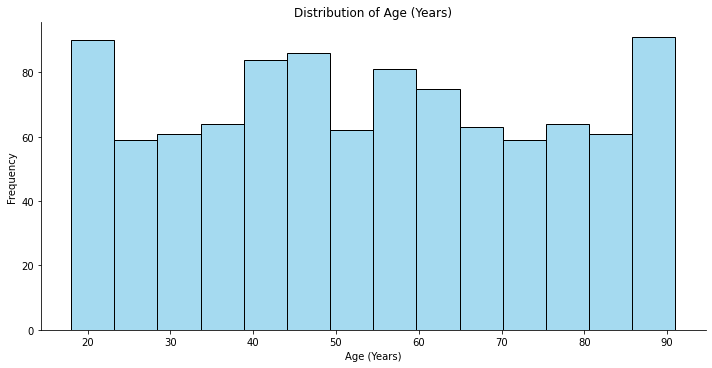

How many bins would be required for a bin_width of 5 = 14


In [27]:
# univariate plots  
age_data = customer_df["Age (Years)"]

# calculating how many bins would be required for a bin_width of 5
n_bins = int((age_data.max() - age_data.min()) / 5)

age_years = sns.displot(customer_df, x="Age (Years)", bins=n_bins, color='skyblue', aspect=2)

# Set plot labels and title
plt.xlabel("Age (Years)")
plt.ylabel("Frequency")
plt.title("Distribution of Age (Years)")

# Show the plot
plt.show()



print("How many bins would be required for a bin_width of 5 = {}".format(n_bins))

b)

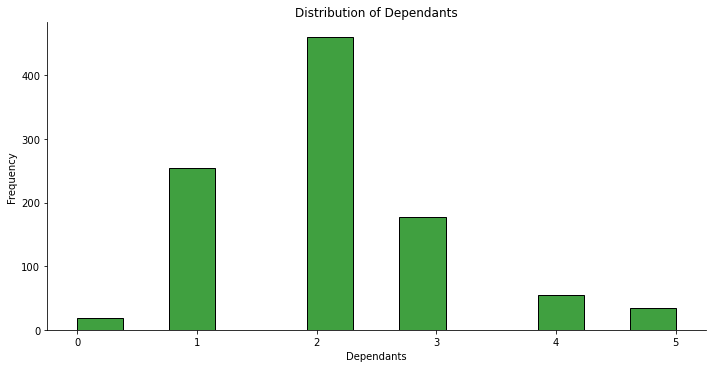

In [28]:
# fill data values having no dependants with 0
customer_df["Dependants"] = customer_df["Dependants"].fillna(0)
dependants_data = customer_df["Dependants"]


dependants = sns.displot(customer_df, x="Dependants", color='green', aspect=2, )


# Set plot labels and title
plt.xlabel("Dependants")
plt.ylabel("Frequency")
plt.title("Distribution of Dependants")

# Show the plot
plt.show()

In [ ]:
customer_df.columns

c)

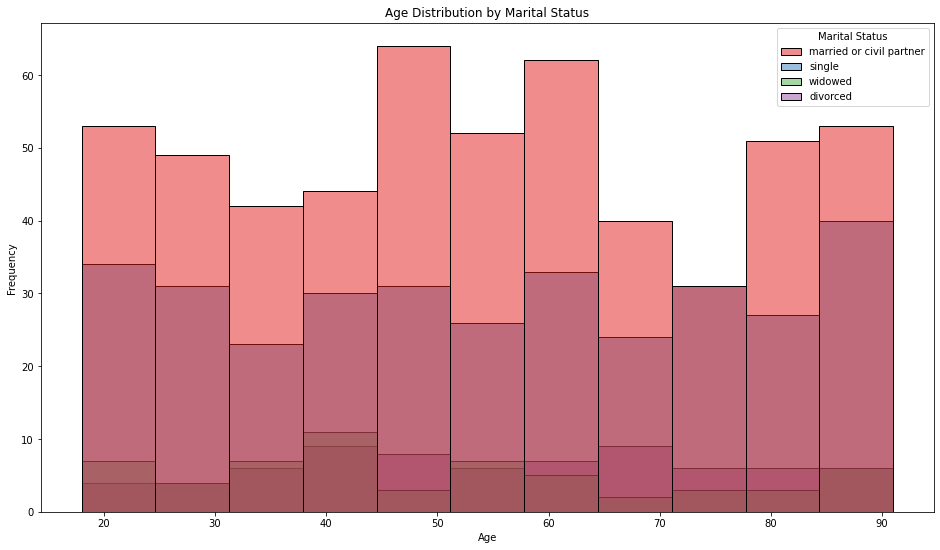

In [29]:
# Set the plot size
plt.figure(figsize=(16, 9))

# Create a histogram with different colors for each Marital Status
age_distribution = sns.histplot(customer_df, x="Age (Years)", hue="Marital Status", palette="Set1")

# Set plot labels and title
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution by Marital Status")


# Show the plot
plt.show()

### 3. Perform multivariate plots with the following data attributes: 
    a. Commuted distance against salary. 
    b. Age against Salary 
    c. Age against Salary conditioned by Dependants 

a)

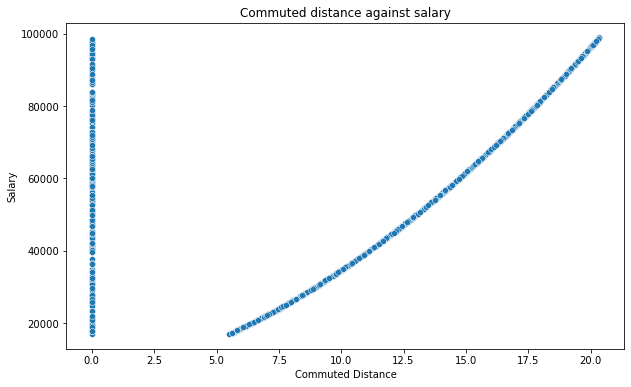

In [30]:
#  Commuted distance against salary
distance = customer_df["Distance Commuted to Work (Km)"]
salary = customer_df["Yearly Salary (GBP)"]

# Set the plot size
plt.figure(figsize=(10, 6))

# Create a scatter plot for Commuted distance against Salary
cummuted_distance =  sns.scatterplot(data = customer_df, x = distance, y = salary)

# Set plot labels and title
plt.xlabel("Commuted Distance")
plt.ylabel("Salary")
plt.title("Commuted distance against salary")

# Show the plot
plt.show()


b)

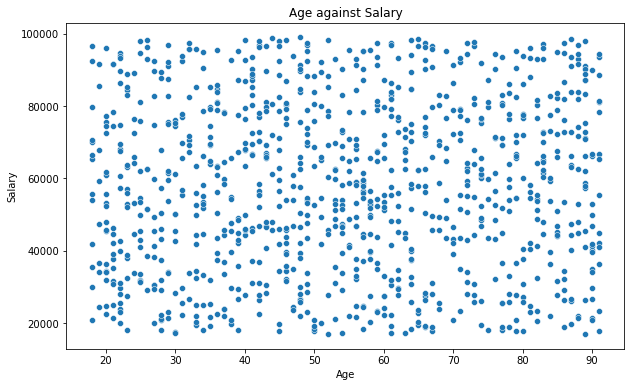

In [31]:
# Set the plot size
plt.figure(figsize=(10, 6))

# Create a scatter plot for Age against Salary
age_salary = sns.scatterplot(data=customer_df, x='Age (Years)', y='Yearly Salary (GBP)')

# Set plot labels and title
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age against Salary")

# Show the plot
plt.show()

c)

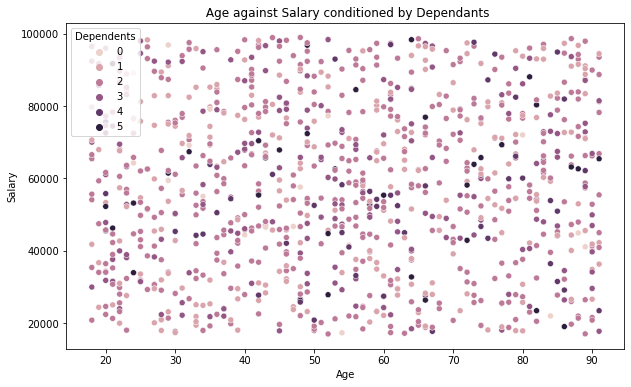

In [32]:
customer_df["Dependants"] = customer_df["Dependants"].astype(int)

# Set the plot size
plt.figure(figsize=(10, 6))

# Create a scatter plot for Age against Salary
age_salary_dependants = sns.scatterplot(data=customer_df, x='Age (Years)', y='Yearly Salary (GBP)',  hue='Dependants')

# Set plot labels and title
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title(" Age against Salary conditioned by Dependants")

# Set legend
plt.legend(title="Dependents")

# Show the plot
plt.show()

### 4) Your client would like the ability to save the plots which you have produced. 

In [33]:
# Save Images
age_years.savefig("age_years.png")
dependants.savefig("dependants.png")
age_distribution.get_figure().savefig("age_distribution.png")

cummuted_distance.get_figure().savefig("cummuted_distance.png")
age_salary.get_figure().savefig("age_salary.png")
age_salary_dependants.get_figure().savefig("age_salary_dependants.png")